In [158]:
import pandas as pd
import matplotlib.pyplot as plt

wildlife = pd.read_csv("../Data/CITES_wildlife_trade_database.csv")
wildlife.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


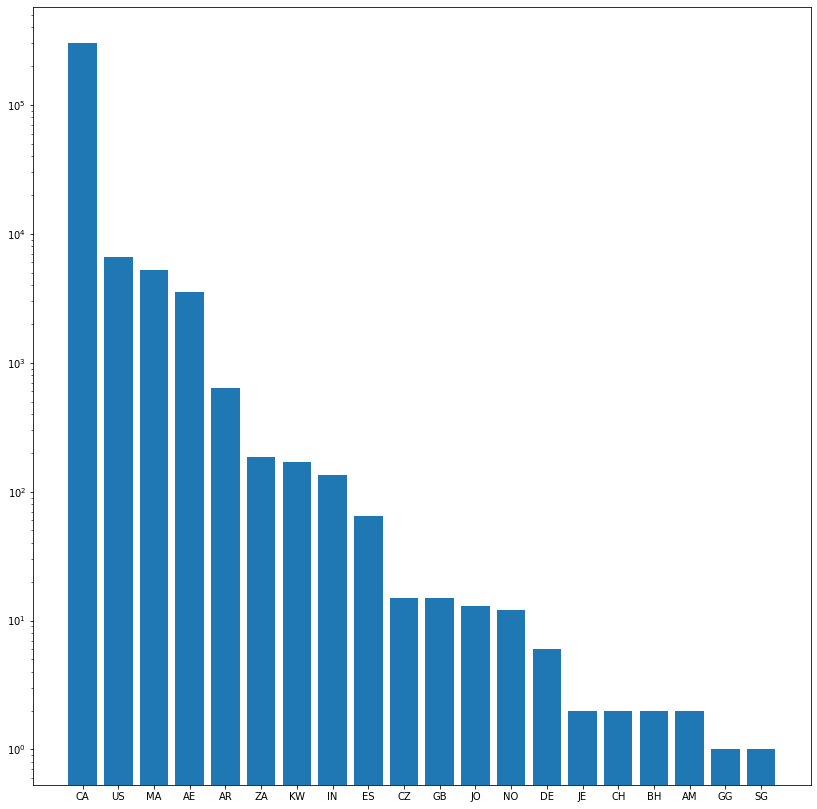

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

wildlife = pd.read_csv("../Data/CITES_wildlife_trade_database.csv")

reintroduction = wildlife[wildlife['Purpose'].isin(['N'])]

exporterdict = {}
for index, row in reintroduction.iterrows():
    exporter = row['Exporter']
    imprq = row['Importer reported quantity']
    emprq = row['Exporter reported quantity']
    
    
    if emprq > 0:
        quantity = emprq
    elif imprq > 0:
        quantity = imprq
    else:
        quantity = 0
    
    if exporter in exporterdict:
        exporterdict[exporter] += quantity 
    else:
        
        exporterdict[exporter]  = quantity

sortedexportdict = sorted(exporterdict.items(),key = lambda x: x[1],reverse=True)

list1, list2 = zip(*sortedexportdict)

fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
countries = list1
export = list2
ax.bar(countries,export)
plt.yscale("log")
fig.savefig("../Figures/biggest_exporters.png")
plt.show()

<Figure size 432x288 with 0 Axes>

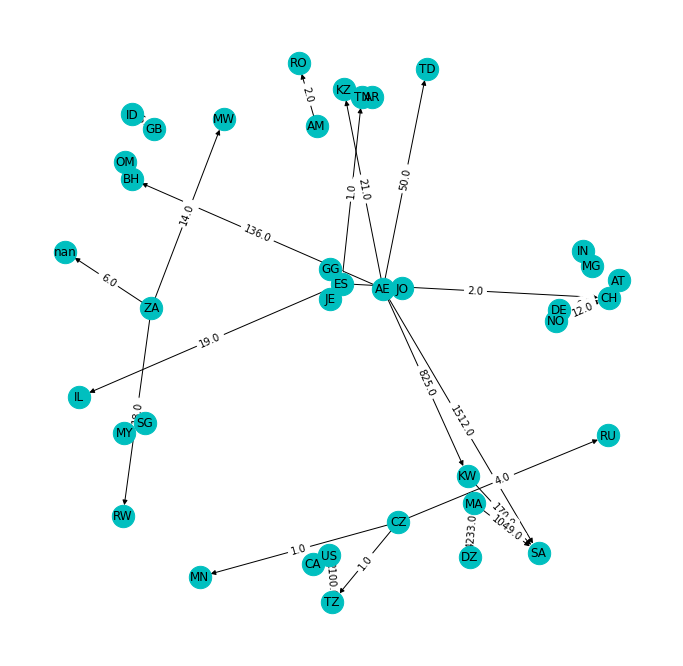

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

wildlife = pd.read_csv("../Data/CITES_wildlife_trade_database.csv")
wildlife.head()

reintroduction = wildlife[wildlife['Purpose'].isin(['N'])]

nodes = []
edges = []
edgevalues = {}
for index, row in reintroduction.iterrows():
    exporter = row['Exporter']
    importer = row['Importer']
    imprq = row['Importer reported quantity']
    emprq = row['Exporter reported quantity']
    
    if emprq > 0:
        quantity = emprq
    elif imprq > 0:
        quantity = imprq
    else:
        quantity = 0
    
    edge = (exporter,importer)
    if edge in edges:
        pass
    else:
        edges.append(edge)
        
        if edge in edgevalues.keys():
            edgevalues[edge] += quantity
        else:
            edgevalues[edge] = quantity
        
    if exporter in nodes:
        pass
    else:
        nodes.append(exporter)
    if importer in nodes:
        pass
    else:
        nodes.append(importer)
        


G=nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)


plt.figure()
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edgevalues)
nx.draw(G,pos,node_size=500,node_color="c")

plt.savefig("../Figures/export_network.png")
plt.show()